<a href="https://colab.research.google.com/github/Abishethvarman/FakeNewsDetection/blob/sentiment-analysis/V1_5_Sentiment_Analysis_VADER%2BBoW_FakeNews_20k_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach

Sentiment Analysis on referencing this https://www.kaggle.com/code/robikscube/sentiment-analysis-python-youtube-tutorial/notebook

DS used here is https://drive.google.com/file/d/1vdscq2CYrj2Gp4lH-JTplHGUq7lrJ6ts/view?usp=drive_link



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import re
import nltk
import gensim

from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
from tqdm.notebook import tqdm

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
plt.style.use('ggplot')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [3]:
%cd /mydrive/dataset/

/content/gdrive/My Drive/dataset


In [4]:
df=pd.read_csv("fake-20000-SA.csv")

In [5]:
print(df.shape)

(20000, 7)


In [6]:
print(df['subject'].unique())

['News' 'politicsNews' 'worldnews' 'politics' 'left-news'
 'Government News' 'Middle-east' 'US_News']


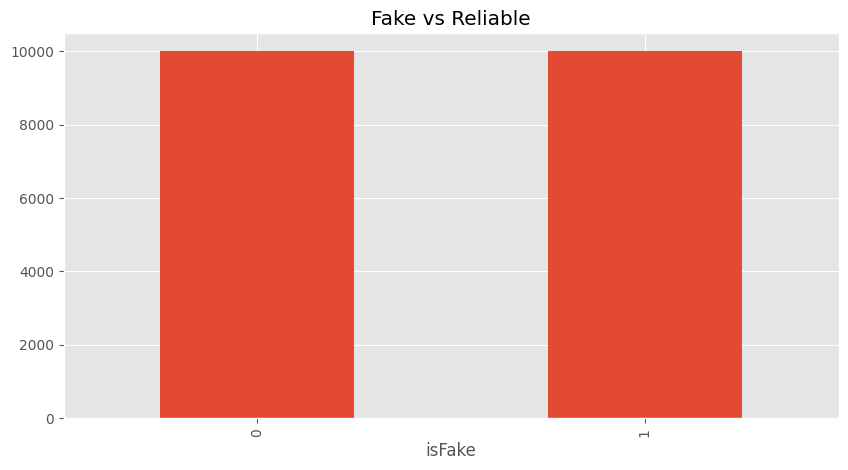

In [7]:
ax = df['isfake'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Fake vs Reliable',
          figsize=(10, 5))
ax.set_xlabel('isFake')
plt.show()

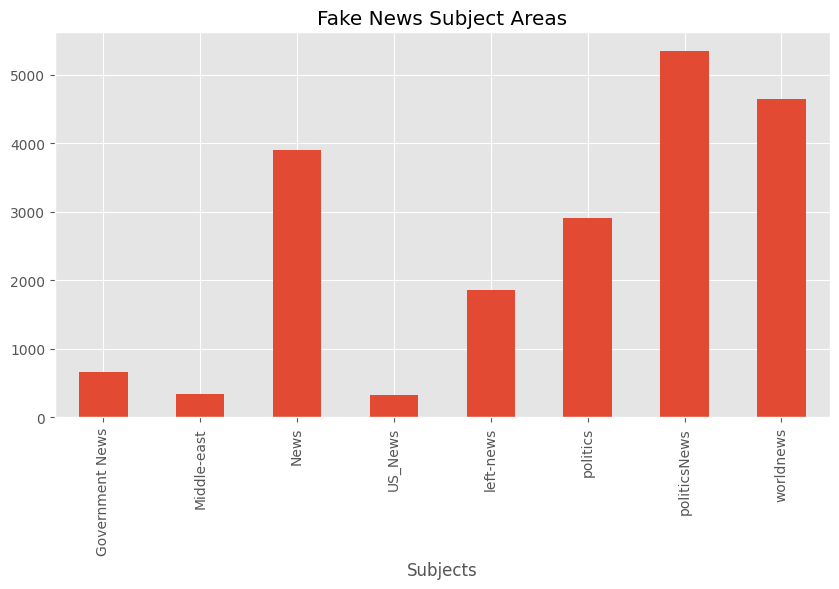

In [8]:
ax = df['subject'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Fake News Subject Areas',
          figsize=(10, 5))
ax.set_xlabel('Subjects')
plt.show()

In [9]:
df['original'] = df['title'] + ' ' + df['text']
df.head()

Unnamed: 0                                              title  \
0       10650   Trump Supporters Terrorize An American Woman ...   
1        2041  Trump adviser's Russia credentials come under ...   
2        8668  Turkey feels betrayed over EU accession but st...   
3        1114  China newspapers say call with Taiwan's Tsai s...   
4       13902   Sean Hannity Just Openly Threatened Someone O...   

                                                text       subject  \
0  Donald Trump s deplorable supporters strike ag...          News   
1  MOSCOW (Reuters) - When Donald Trump named a l...  politicsNews   
2  LONDON (Reuters) - Turkey feels betrayed by so...     worldnews   
3  SHANGHAI (Reuters) - Chinese state media on Mo...  politicsNews   
4  Is there some reason people like Donald Trump ...          News   

                  date  isfake label  \
0     December 3, 2016       1  fake   
1     August 24, 2016        0  real   
2  September 14, 2017        0  real   
3    December 5, 2016        0  real   
4       April 30, 2017       1  fake   

                                            original  
0   Trump Supporters Terrorize An American Woman ...  
1  Trump adviser's Russia credentials come under ...  
2  Turkey feels betrayed over EU accession but st...  
3  China newspapers say call with Taiwan's Tsai s...  
4   Sean Hannity Just Openly Threatened Someone O...

In [11]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'one', 'two', 'more','said','u','however','still','get','many','could'])


In [12]:
# Preprocessing
def preprocess(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() != 'mor']
    return ' '.join(filtered_words)

In [13]:
# Apply preprocessing
df['clean'] = df['original'].apply(preprocess)

In [14]:
df['clean'][5]

'AZ Cops Taser Veteran PTSD Heart Stops Beating ( VIDEO ) Cops America control , yet another case police department needs sued oblivion due excessive force . Kyle Cardenas Gilbert , Arizona veteran PTSD went harrowing tours duty Iraq . family says contacted VA Crisis Hotline due Kyle mental health emergency related PTSD . things went wrong.The Gilbert cops showed , scuffle . thing really awful family insisted wanted crisis team also hammered point home wanted cops . , cops violent cops got . filed official complaint , says , part : police charged bedroom attempted restrain Kyle . melee , officers Tased Kyle least seven times , sprayed OC spray directly Kyle face , struck Kyle multiple times batons , punched Kyle face closed fists , kicked kneed Kyle thighs legs , ordered K-9 unit dogs attack bite Kyle . beyond despicable , wait . Kyle immobilized hospital gurney , trigger happy cops used Taser , time heart stopped beating medical professionals restart it.Of course , despite , cops play

In [ ]:
##NLTK done foe checking the polarity

In [ ]:
text_data = df['clean'][4]
print(text_data)

Sean Hannity Openly Threatened Someone Twitter , May Fox News Exec reason people like Donald Trump ardent fans handle problems without making threats ? Sean Hannity publicly threatening someone tweeting talking lawyers libel , slander , defamation , tortious interference . alleged journalist , really ought know words mean throw around.He also quite bit posturing , including issuing threat : Oh FYI , Whoever remember , IP addresses traceable . Get Ready . Sean Hannity ( @ seanhannity ) May 1 , 2017Many tweet assume referring sexual harassment accuser , Debbie Schlussel . However , tweet suggests talking whoever thinks traitor Fox News : way way way bigger individual . https : //t.co/ERvdrmUdeE Sean Hannity ( @ seanhannity ) April 30 , 2017Hannity recently gave interview Vanity Fair , defended embattled co-president Bill Shine , caught sexual harassment investigation Fox News . , traitor Fox News , claimed know . Bill Reilly ouster amid sexual harassment scandal , people began saying goi

In [ ]:
tokens = nltk.word_tokenize(text_data)

In [ ]:
print(tokens)

['Sean', 'Hannity', 'Openly', 'Threatened', 'Someone', 'Twitter', ',', 'May', 'Fox', 'News', 'Exec', 'reason', 'people', 'like', 'Donald', 'Trump', 'ardent', 'fans', 'handle', 'problems', 'without', 'making', 'threats', '?', 'Sean', 'Hannity', 'publicly', 'threatening', 'someone', 'tweeting', 'talking', 'lawyers', 'libel', ',', 'slander', ',', 'defamation', ',', 'tortious', 'interference', '.', 'alleged', 'journalist', ',', 'really', 'ought', 'know', 'words', 'mean', 'throw', 'around.He', 'also', 'quite', 'bit', 'posturing', ',', 'including', 'issuing', 'threat', ':', 'Oh', 'FYI', ',', 'Whoever', 'remember', ',', 'IP', 'addresses', 'traceable', '.', 'Get', 'Ready', '.', 'Sean', 'Hannity', '(', '@', 'seanhannity', ')', 'May', '1', ',', '2017Many', 'tweet', 'assume', 'referring', 'sexual', 'harassment', 'accuser', ',', 'Debbie', 'Schlussel', '.', 'However', ',', 'tweet', 'suggests', 'talking', 'whoever', 'thinks', 'traitor', 'Fox', 'News', ':', 'way', 'way', 'way', 'bigger', 'individual'

In [ ]:
#part of speech tagging
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Sean', 'JJ'),
 ('Hannity', 'NNP'),
 ('Openly', 'NNP'),
 ('Threatened', 'VBD'),
 ('Someone', 'NNP'),
 ('Twitter', 'NNP'),
 (',', ','),
 ('May', 'NNP'),
 ('Fox', 'NNP'),
 ('News', 'NNP')]

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Sean/JJ)
  (ORGANIZATION Hannity/NNP Openly/NNP)
  Threatened/VBD
  (PERSON Someone/NNP Twitter/NNP)
  ,/,
  (PERSON May/NNP Fox/NNP News/NNP Exec/NNP)
  reason/NN
  people/NNS
  like/IN
  (PERSON Donald/NNP Trump/NNP)
  ardent/NN
  fans/NNS
  handle/VBP
  problems/NNS
  without/IN
  making/VBG
  threats/NNS
  ?/.
  Sean/JJ
  Hannity/NNP
  publicly/RB
  threatening/VBG
  someone/NN
  tweeting/VBG
  talking/VBG
  lawyers/NNS
  libel/NN
  ,/,
  slander/NN
  ,/,
  defamation/NN
  ,/,
  tortious/JJ
  interference/NN
  ./.
  alleged/JJ
  journalist/NN
  ,/,
  really/RB
  ought/MD
  know/VB
  words/NNS
  mean/JJ
  throw/NN
  around.He/NN
  also/RB
  quite/RB
  bit/JJ
  posturing/NN
  ,/,
  including/VBG
  issuing/VBG
  threat/NN
  :/:
  Oh/NNP
  FYI/NNP
  ,/,
  (PERSON Whoever/NNP)
  remember/VB
  ,/,
  (ORGANIZATION IP/NNP)
  addresses/VBZ
  traceable/JJ
  ./.
  Get/NNP
  Ready/JJ
  ./.
  (PERSON Sean/JJ Hannity/NNP)
  (/(
  @/NNP
  seanhannity/NN
  )/)
  May/NNP
  1/CD
  ,/,
  20

In [ ]:
sia.polarity_scores(str(text_data))

{'neg': 0.157, 'neu': 0.743, 'pos': 0.1, 'compound': -0.9601}

In [ ]:
#-----------------till this point----------------#

In [16]:
sia = SentimentIntensityAnalyzer()

In [17]:
df['id'] = df.index + 1

In [18]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['clean']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/20000 [00:00<?, ?it/s]

In [19]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(df, how='left')
vaders.head(2)

id    neg    neu    pos  compound  Unnamed: 0  \
0   1  0.294  0.572  0.134   -0.9961       10650   
1   2  0.054  0.848  0.098    0.9797        2041   

                                               title  \
0   Trump Supporters Terrorize An American Woman ...   
1  Trump adviser's Russia credentials come under ...   

                                                text       subject  \
0  Donald Trump s deplorable supporters strike ag...          News   
1  MOSCOW (Reuters) - When Donald Trump named a l...  politicsNews   

               date  isfake label  \
0  December 3, 2016       1  fake   
1  August 24, 2016        0  real   

                                            original  \
0   Trump Supporters Terrorize An American Woman ...   
1  Trump adviser's Russia credentials come under ...   

                                               clean  \
0  Trump Supporters Terrorize American Woman Subw...   
1  Trump adviser 's Russia credentials come scrut...   

                                        clean_joined  
0  T r u m p   S u p p o r t e r s   T e r r o r ...  
1  T r u m p   a d v i s e r   ' s   R u s s i a ...

In [20]:
# Convert VADER scores to binary sentiment labels
vaders['sentiment'] = vaders['compound'].apply(lambda x: 1 if x >= 0 else 0)

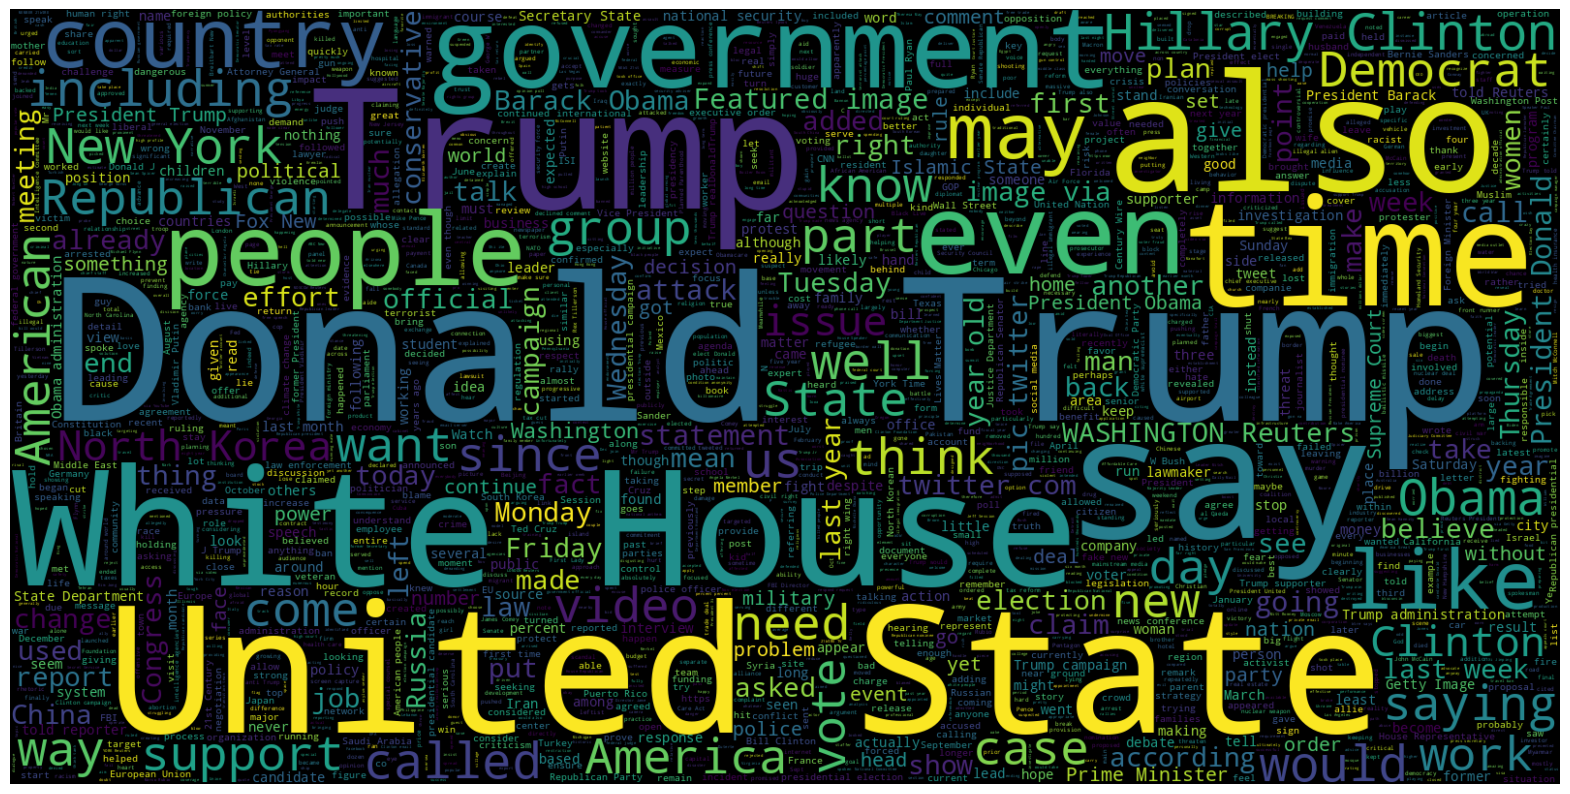

In [21]:
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=stop_words).generate(" ".join(vaders.clean))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

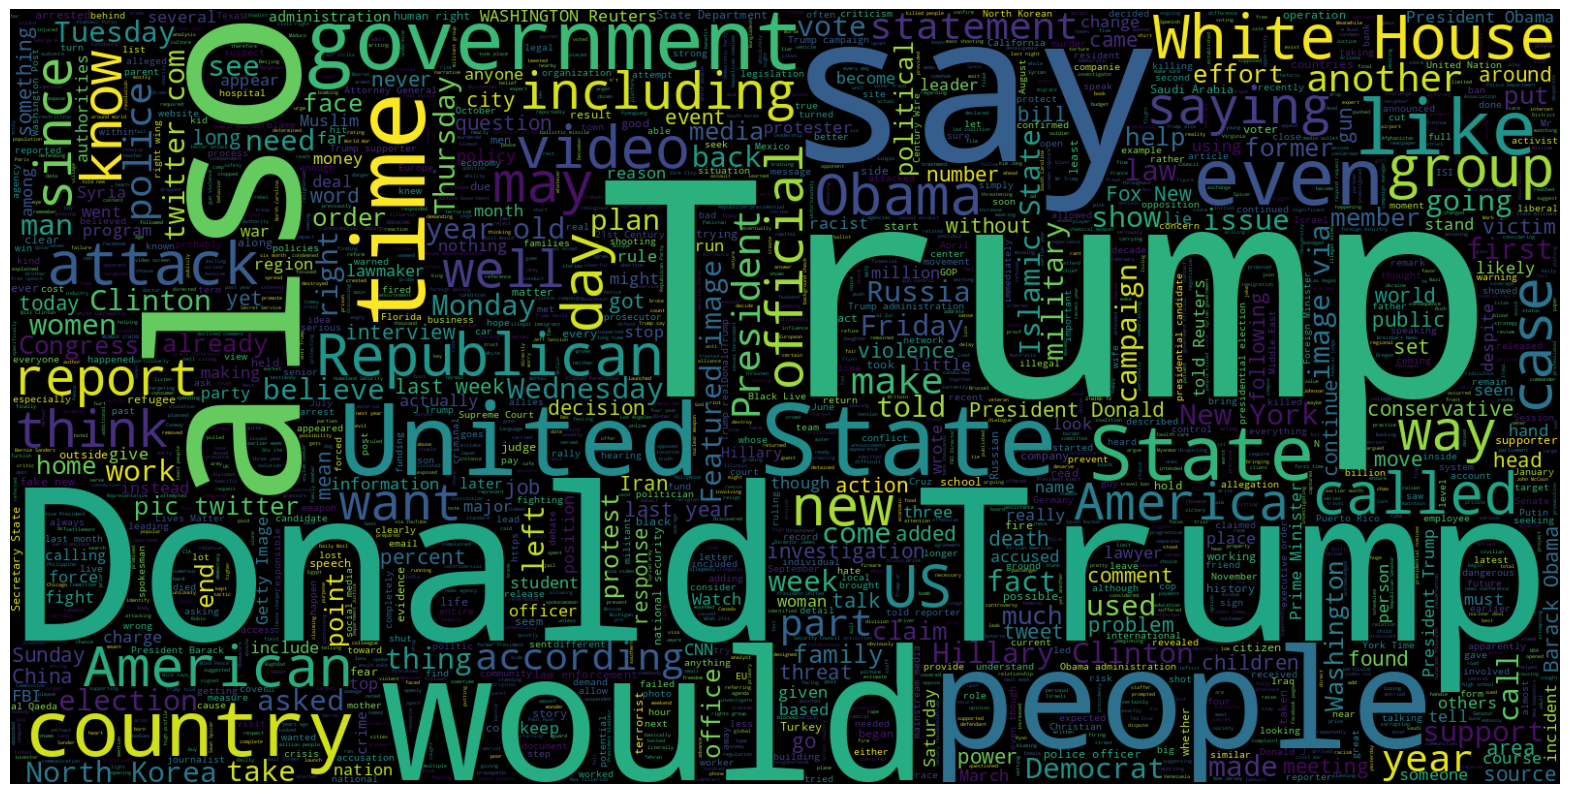

In [22]:
#negative sentiment
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(vaders[vaders.sentiment == 0].clean))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

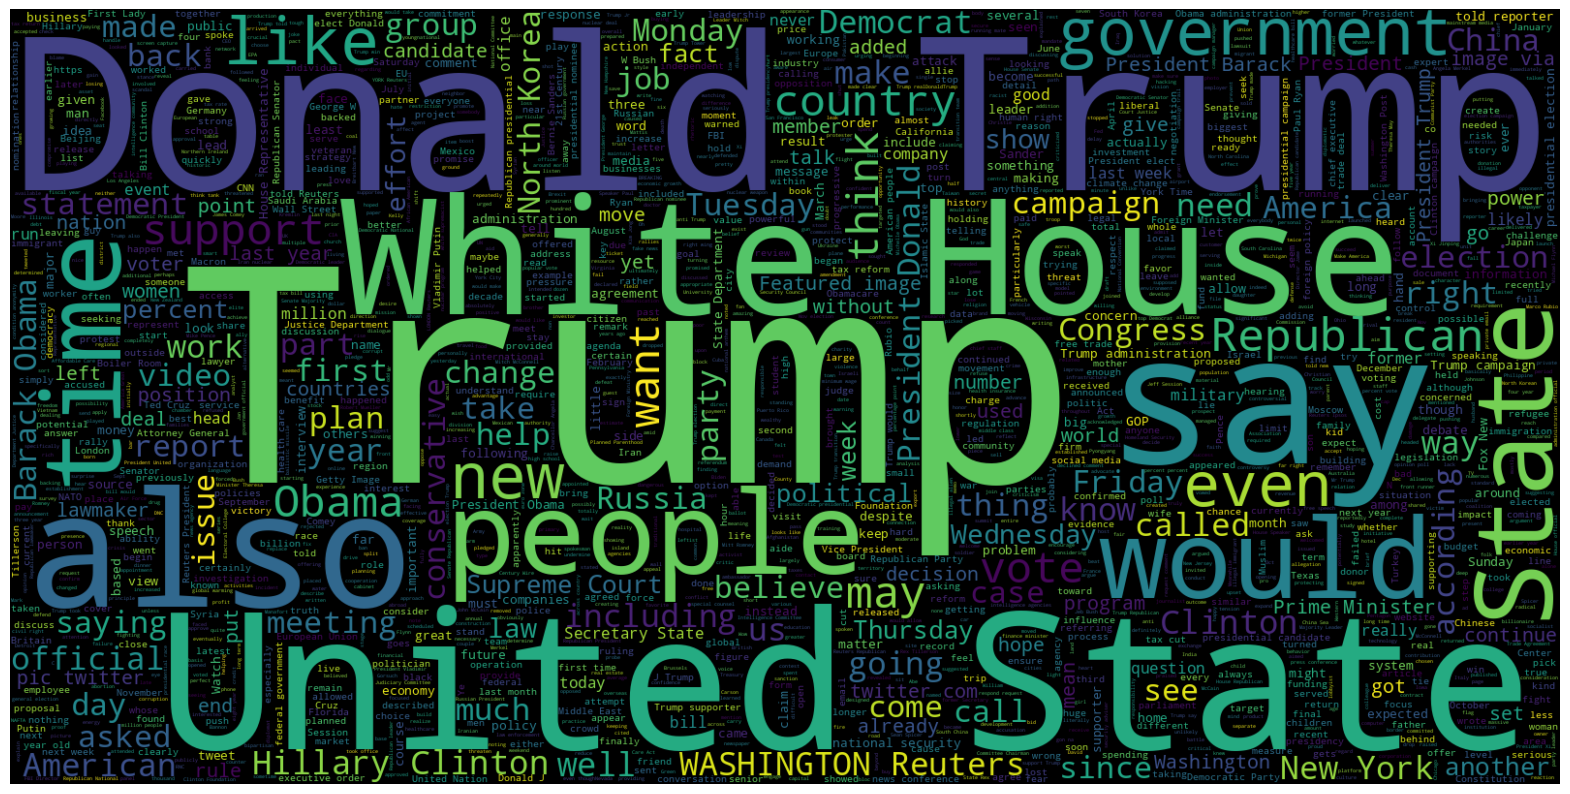

In [23]:
#positive sentiment
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(vaders[vaders.sentiment == 1].clean))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [24]:
print(vaders['isfake'].unique())

[1 0]


In [26]:
print(vaders['sentiment'].unique())

[0 1]


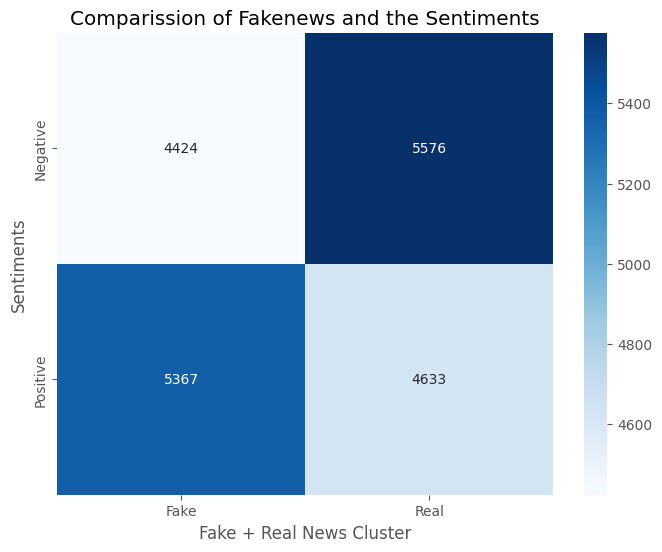

In [27]:
FakeOrNot = vaders['isfake']
PosOrNeg = vaders['sentiment']

conf_matrix = confusion_matrix(FakeOrNot, PosOrNeg)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Fake + Real News Cluster')

plt.ylabel('Sentiments')

plt.title('Comparission of Fakenews and the Sentiments')
plt.show()
